In [1]:
from datasets import load_dataset
from transformers import AutoTokenizer

In [2]:
from torch.utils.data import DataLoader

In [3]:
import seaborn as sns

In [4]:
from sst2_eval import *

In [5]:
sst2 = load_dataset("stanfordnlp/sst2")
tokenizer = AutoTokenizer.from_pretrained("google/mobilebert-uncased")

In [6]:
data_loader = DataLoader(
    sst2["validation"],
    batch_size=32,
    collate_fn=lambda batch: collate_sst2_batch(tokenizer, batch),
)

In [7]:
mean_cosine_similarities_base = aggregate_mean_cosine_similarities(
    load_sst2_pt_model(),
    load_sst2_ft_model("sst2-base.pt", mode="base"),
    data_loader,
)

Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 28/28 [00:05<00:00,  4.77it/s]


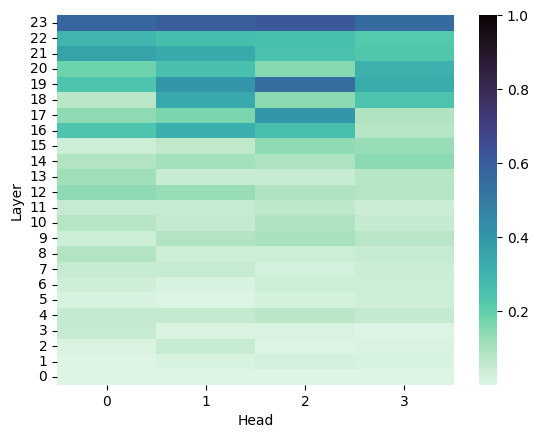

In [11]:
ax = sns.heatmap(1 - mean_cosine_similarities_base, cmap="mako_r", vmax=1.0)
ax.set_xlabel("Head")
ax.set_ylabel("Layer")
ax.invert_yaxis()

In [12]:
mean_cosine_similarities_lora = aggregate_mean_cosine_similarities(
    load_sst2_pt_model(),
    load_sst2_ft_model("sst2-lora.pt", mode="lora", lora_rank=8),
    data_loader,
)

Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 28/28 [00:05<00:00,  5.18it/s]


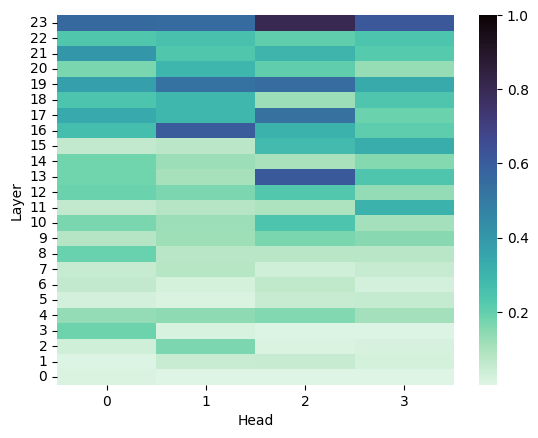

In [13]:
ax = sns.heatmap(1 - mean_cosine_similarities_lora, cmap="mako_r", vmax=1.0)
ax.set_xlabel("Head")
ax.set_ylabel("Layer")
ax.invert_yaxis()